In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
from IPython.display import display

import my_module

mpl.style.use("default")

pd.set_option("display.max_rows", 20)
pd.set_option("display.max_columns", None)

In [68]:
df_acc, df_care = my_module.read_data(8)

In [69]:
print(df_acc.shape, df_acc.isnull().sum(), df_acc.duplicated().sum())
df_acc = df_acc.drop_duplicates()
df_acc.head()

(5112531, 5) subject_id    0
datetime      0
x             0
y             0
z             0
dtype: int64 4675647


,subject_id,datetime,x,y,z
0,8,2018-06-03T07:55:29.965+0900,2.375,-11.837,-0.664
1,8,2018-06-03T08:29:26.250+0900,2.375,3.486,8.968
2,8,2018-06-03T09:22:56.925+0900,2.375,4.405,8.436
3,8,2018-06-02T13:01:17.956+0900,2.375,4.367,8.849
4,8,2018-06-03T09:28:48.797+0900,2.375,4.060,8.707


In [71]:
df_acc = my_module.convert_datetime(df_acc, ["datetime"])
df_acc = df_acc.sort_values(["datetime"])

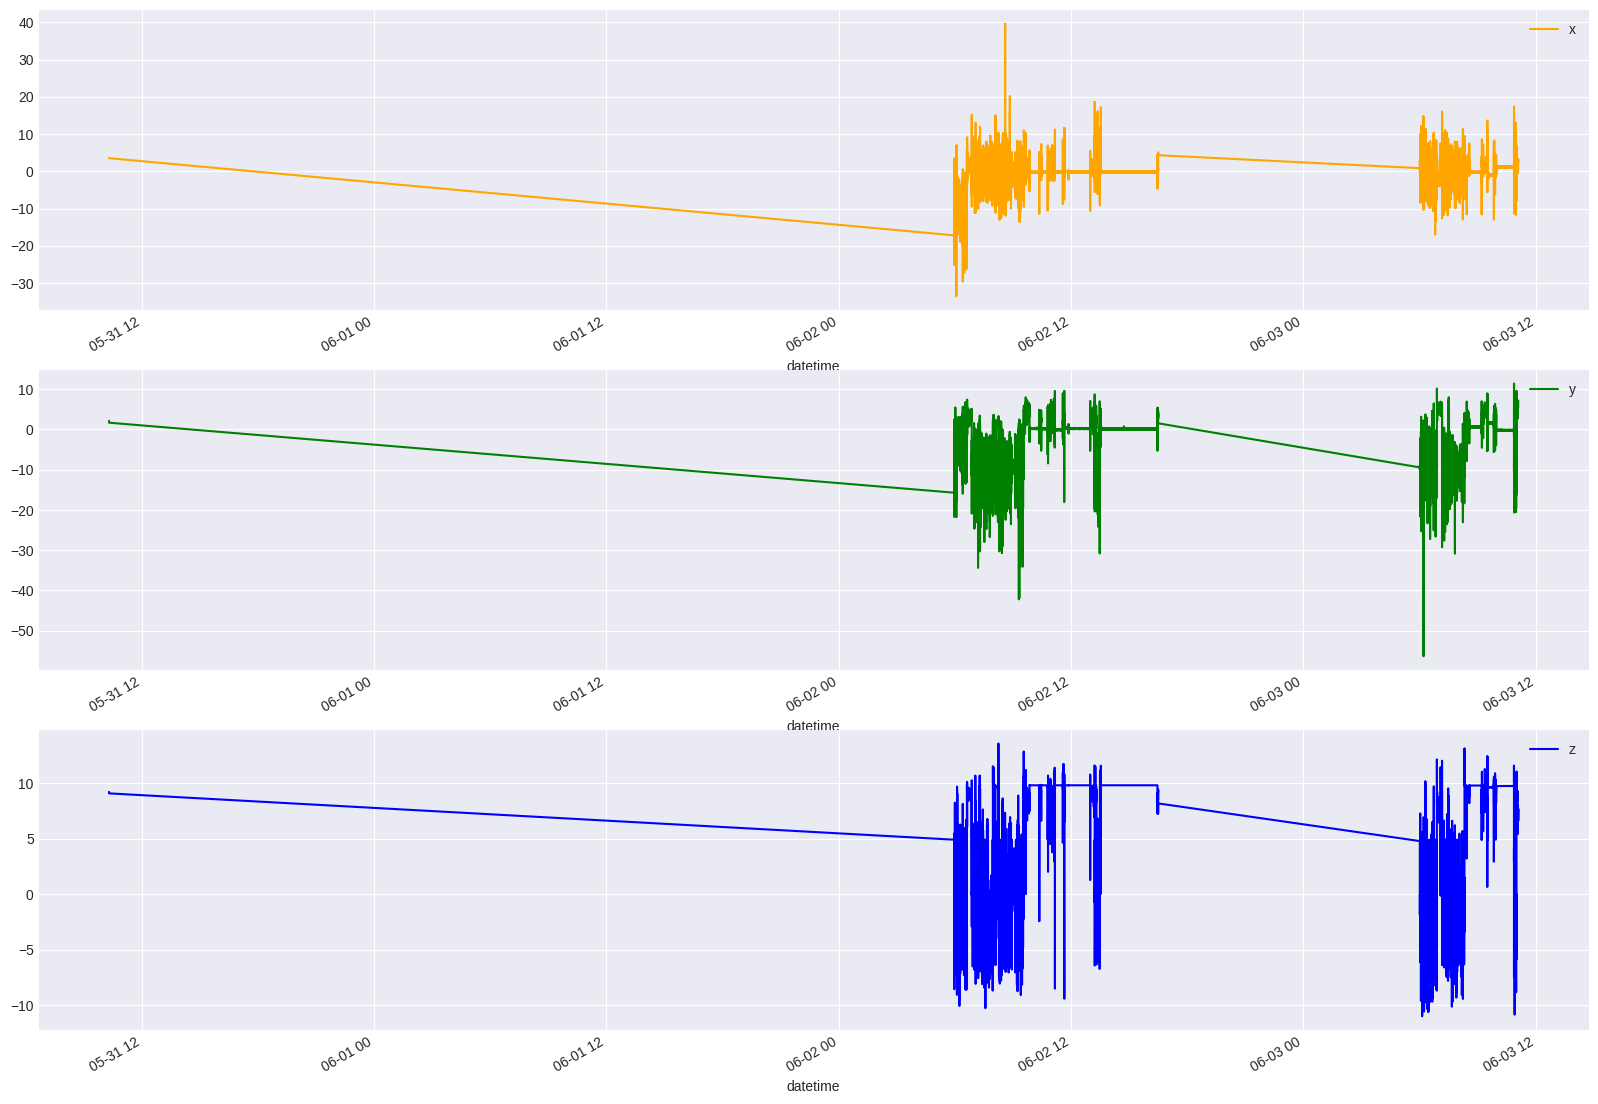

In [73]:
fig, axes = plt.subplots(3, 1, figsize=(20, 15))
colors = ["orange", "green", "blue"]
columns = ["x", "y", "z"]
for i in range(3):
    df_acc.plot(x="datetime", y=columns[i], ax=axes[i], color=colors[i]);
plt.savefig("../output.png")

## DataPreprocessing

In [103]:
number = 14
df_acc, df_care = my_module.read_data(number)
df_care = my_module.convert_datetime(df_care, ["start", "finish"])
df_acc = my_module.convert_datetime(df_acc, ["datetime"])

In [16]:
display(df_care.head()), display(df_acc.head())

,id,user_id,activity_type_id,activity_type,target_id,activity2user_id,start,finish,year-month-date-hour,time_length,time_length_seconds
996,710,15,28,特記事項・連絡事項,4,11891,2018-02-07 17:50:25+09:00,2018-02-07 17:50:49+09:00,2018-02-07-17.0,0 days 00:00:24,24.0
111,929,15,5,入浴・清拭,29,11603,2018-02-09 18:16:45+09:00,2018-02-09 18:16:47+09:00,2018-02-09-18.0,0 days 00:00:02,2.0
112,929,15,5,入浴・清拭,30,11604,2018-02-09 18:16:45+09:00,2018-02-09 18:16:47+09:00,2018-02-09-18.0,0 days 00:00:02,2.0
145,3346,15,2,食事・服薬,87,23460,2018-03-21 07:33:21+09:00,2018-03-21 08:15:10+09:00,2018-03-21-7.0,0 days 00:41:49,2509.0
147,3346,15,2,食事・服薬,89,23462,2018-03-21 07:33:21+09:00,2018-03-21 08:15:10+09:00,2018-03-21-7.0,0 days 00:41:49,2509.0


,subject_id,datetime,x,y,z
4413370,15,2018-04-21 19:02:14.166000+09:00,-9.385,-0.191,0.277
4415521,15,2018-04-21 19:02:14.366000+09:00,-9.385,-0.191,0.277
4331967,15,2018-04-21 19:02:14.566000+09:00,-9.385,-0.191,0.279
497748,15,2018-04-21 19:02:14.766000+09:00,-9.270,-0.038,0.286
497146,15,2018-04-21 19:02:14.772000+09:00,-9.270,-0.038,0.286


(None, None)

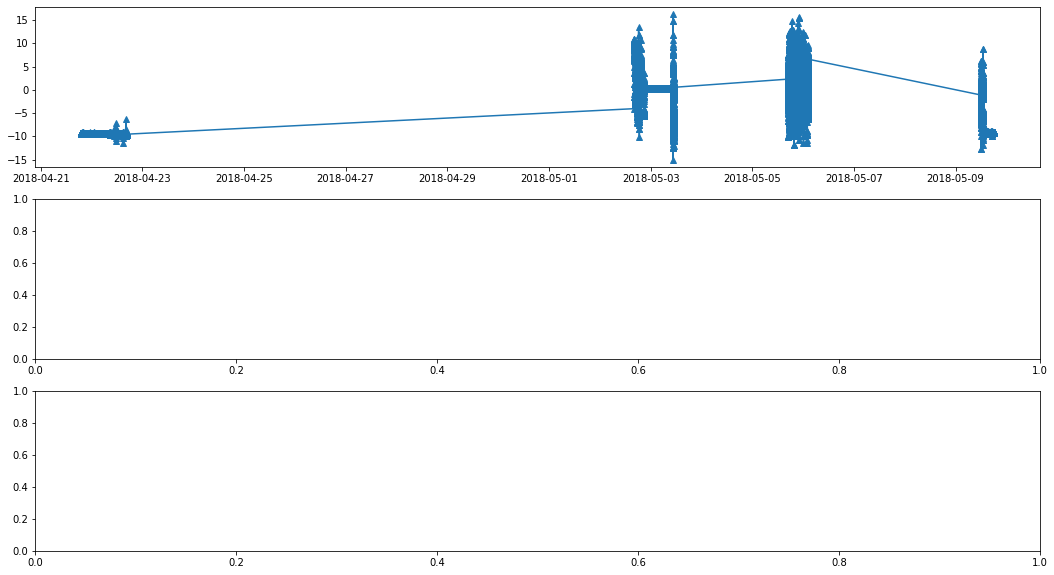

In [17]:
from scipy.interpolate import interp1d
from datetime import datetime, timedelta
import math
import matplotlib.dates as mdates


dt = timedelta(seconds=1)  # 時間間隔
t = [datetime.fromtimestamp(i.astype(datetime) * 1e-9) for i in df_acc["datetime"].values]
x = df_acc["x"]


# # 補間用の時刻列作成。
# # ここでは元の時間間隔の半分の時刻列を作る
# dt_new = dt/2
# num_new = len(t)
# t_new = [t[0] + x * dt_new for x in range(num_new)]

# # interp関数はdatetime型を受け付けない
# # 時刻をdatetime型からunix時間（float）に変換する
# t_unix = [x.timestamp() for x in t]
# t_new_unix = [x.timestamp() for x in t_new]

# # # 方法1: numpy で補間
# x_numpy = np.interp(t_new_unix, t_unix, x)

# # 方法2: scipy で補間
# # 補間方法選択
# kind = "linear", "nearest", "zero", "slinear", "quadratic", "cubic", "previous", "next"
# kind = "cubic"
# f = interp1d(t_unix, x, kind="linear", bounds_error=False)
# x_scipy = f(t_new_unix)


fig, axes = plt.subplots(3, 1, figsize=(18, 10))
axes[0].plot(t, x, marker="^")
# axes[1].plot(t_new, x_numpy, marker="o");
# axes[2].plot(t_new, x_scipy, marker="o");

In [50]:
# import datetime 
# from dateutil import tz

# JST = tz.gettz("Asia/Tokyo")

# start_date = datetime.datetime(2018, 6, 28, microsecond=0, tzinfo=JST)
# finish_date = datetime.datetime(2018, 4, 30, microsecond=0, tzinfo=JST)
# display(df_care[(df_care["finish"] <= finish_date)])
# df_care_series = df_care[(df_care["finish"] <= finish_date) & (df_care["start"] >= start_date)]
# display(df_care_series)
# start_date = df_care_series["start"]
# finish_date = df_care_series["finish"]
# print(start_date, finish_date)
# df_acc[(df_acc["datetime"] < finish_date)]

## 全データ

In [3]:
from glob import glob
from tqdm import tqdm
df_care = pd.DataFrame()
for path in tqdm(glob("../data/Care Record Data/*")):
    tmp = pd.read_csv(path)
    df_care = pd.concat([df_care, tmp])

df_acc = pd.DataFrame()
for path in tqdm(glob("../data/Accelerometer Data/*")):
    tmp = pd.read_csv(path)
    df_acc = pd.concat([df_acc, tmp])

100%|██████████| 5/5 [00:30<00:00,  6.17s/it]


In [4]:
# str convert to datetime
df_care = my_module.convert_datetime(df_care, ["start", "finish"])
df_acc = my_module.convert_datetime(df_acc, ["datetime"])

# add time_length columns
df_care = my_module.add_timeLength_timeLengthSeconds(df_care)

In [5]:
display(df_care.head()), display(df_acc.head());

,id,user_id,activity_type_id,activity_type,target_id,activity2user_id,start,finish,year-month-date-hour,time_length,time_length_seconds
0,4173,15,26,休憩,15,25397,2018-03-31 21:29:28+09:00,2018-03-31 22:02:45+09:00,2018-03-31-21.0,0 days 00:33:17,1997.0
1,4410,15,26,休憩,15,26067,2018-04-03 21:49:23+09:00,2018-04-03 22:13:44+09:00,2018-04-03-21.0,0 days 00:24:21,1461.0
2,6280,15,26,休憩,15,31067,2018-04-15 21:53:08+09:00,2018-04-15 22:14:46+09:00,2018-04-15-21.0,0 days 00:21:38,1298.0
3,7928,15,26,休憩,15,34782,2018-04-21 21:34:30+09:00,2018-04-21 22:02:20+09:00,2018-04-21-21.0,0 days 00:27:50,1670.0
4,12797,15,26,休憩,15,45514,2018-05-06 21:49:48+09:00,2018-05-06 22:08:50+09:00,2018-05-06-21.0,0 days 00:19:02,1142.0


,subject_id,datetime,x,y,z
0,8,2018-06-03 07:55:29.965000+09:00,2.375,-11.837,-0.664
1,8,2018-06-03 08:29:26.250000+09:00,2.375,3.486,8.968
2,8,2018-06-03 09:22:56.925000+09:00,2.375,4.405,8.436
3,8,2018-06-02 13:01:17.956000+09:00,2.375,4.367,8.849
4,8,2018-06-03 09:28:48.797000+09:00,2.375,4.060,8.707


In [6]:
# drop missing and duplicated data
df_care.dropna(inplace=True)
df_acc.drop_duplicates(inplace=True)

# datetimeごとにsort
df_care.sort_values("start", inplace=True)
df_acc.sort_values("datetime", inplace=True)

In [42]:
tmp = df_care["year-month-date-hour"].str.split("-", expand=True)
df_care["hour"] = tmp.iloc[:, 3].apply(float)
df_care["month_day"] = tmp.loc[:, 1].str.cat(tmp.iloc[:, 2])

In [51]:
# tmp = df_care.groupby(["month_day", "hour", "activity_type_id"], as_index=False).count()
# mpl.style.use("seaborn-darkgrid")
# for month_day in tmp["month_day"].unique():
#     corr = tmp[tmp["month_day"] == month_day].pivot(index="activity_type_id", columns="hour", values="id").fillna(0)
#     plt.figure()
#     sns.heatmap(corr, annot=True)
#     plt.title(month_day)
#     plt.savefig(f"../results/train_heatmap/{month_day}.png")

In [29]:
df_care.head()

,id,user_id,activity_type_id,activity_type,target_id,activity2user_id,start,finish,year-month-date-hour,time_length,time_length_seconds,hour,month_day
3371,179,14,18,申し送り・ミーティング,3,14624,2018-02-02 09:47:16+09:00,2018-02-02 09:47:21+09:00,2018-02-02-9.0,0 days 00:00:05,5.0,9.0,0202
3294,187,14,10,日中利用者対応,35,12354,2018-02-02 11:12:03+09:00,2018-02-02 11:09:40+09:00,2018-02-02-11.0,-1 days +23:57:37,-143.0,11.0,0202
712,189,14,17,手書き記録,31,11803,2018-02-02 11:27:59+09:00,2018-02-02 11:28:00+09:00,2018-02-02-11.0,0 days 00:00:01,1.0,11.0,0202
714,189,14,17,手書き記録,35,11805,2018-02-02 11:27:59+09:00,2018-02-02 11:28:00+09:00,2018-02-02-11.0,0 days 00:00:01,1.0,11.0,0202
715,189,14,17,手書き記録,36,11806,2018-02-02 11:27:59+09:00,2018-02-02 11:28:00+09:00,2018-02-02-11.0,0 days 00:00:01,1.0,11.0,0202


In [25]:
df_care.groupby(["user_id", "activity_type_id"])["activity_type_id"].agg([len]).reset_index().pivot('user_id', 'activity_type_id','len').fillna(0)

activity_type_id,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28
user_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,
8,120.0,918.0,112.0,825.0,107.0,0.0,85.0,32.0,74.0,49.0,142.0,432.0,4.0,3.0,0.0,12.0,47.0,43.0,209.0,85.0,9.0,11.0,2.0,35.0,0.0,0.0,2.0,1.0
13,85.0,556.0,2.0,411.0,35.0,0.0,27.0,1.0,85.0,232.0,80.0,518.0,11.0,12.0,2.0,25.0,8.0,2.0,42.0,0.0,0.0,0.0,4.0,1.0,1.0,0.0,1.0,0.0
14,126.0,650.0,14.0,483.0,1.0,11.0,25.0,0.0,43.0,46.0,58.0,1741.0,17.0,14.0,1.0,80.0,26.0,2.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
15,51.0,268.0,2.0,21.0,3.0,0.0,23.0,0.0,17.0,3.0,27.0,528.0,7.0,1.0,1.0,20.0,0.0,9.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0,1.0
25,2.0,38.0,0.0,33.0,0.0,239.0,2.0,8.0,9.0,97.0,10.0,137.0,4.0,0.0,0.0,9.0,15.0,40.0,0.0,0.0,0.0,22.0,23.0,28.0,6.0,25.0,1.0,1.0


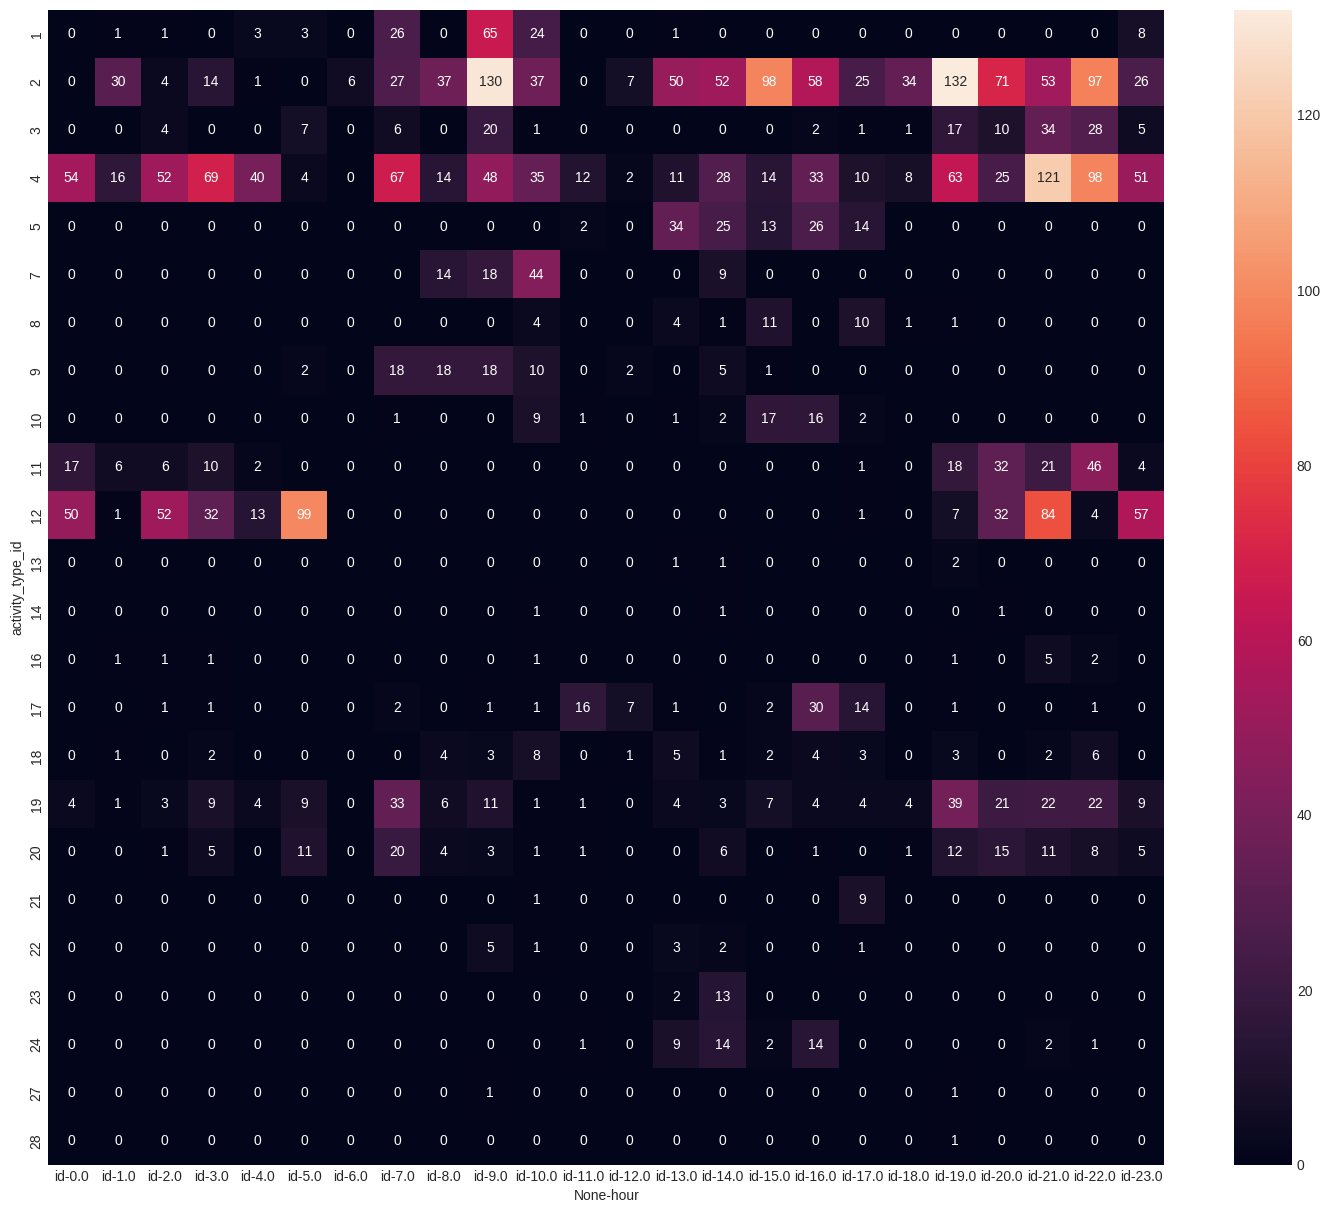

In [74]:
mpl.style.use("seaborn-darkgrid")
df_care["hour"] = df_care["year-month-date-hour"].str.split("-", expand=True).iloc[:, -1].astype(float)
corr = df_care.groupby(["activity_type_id", "hour"]).count().iloc[:, 0].reset_index().sort_values(["activity_type_id", "hour"]).pivot("activity_type_id", "hour").fillna(0).astype(int)
plt.figure(figsize=(18, 15))
sns.heatmap(corr, annot=True, fmt='d');

## OutputFigures

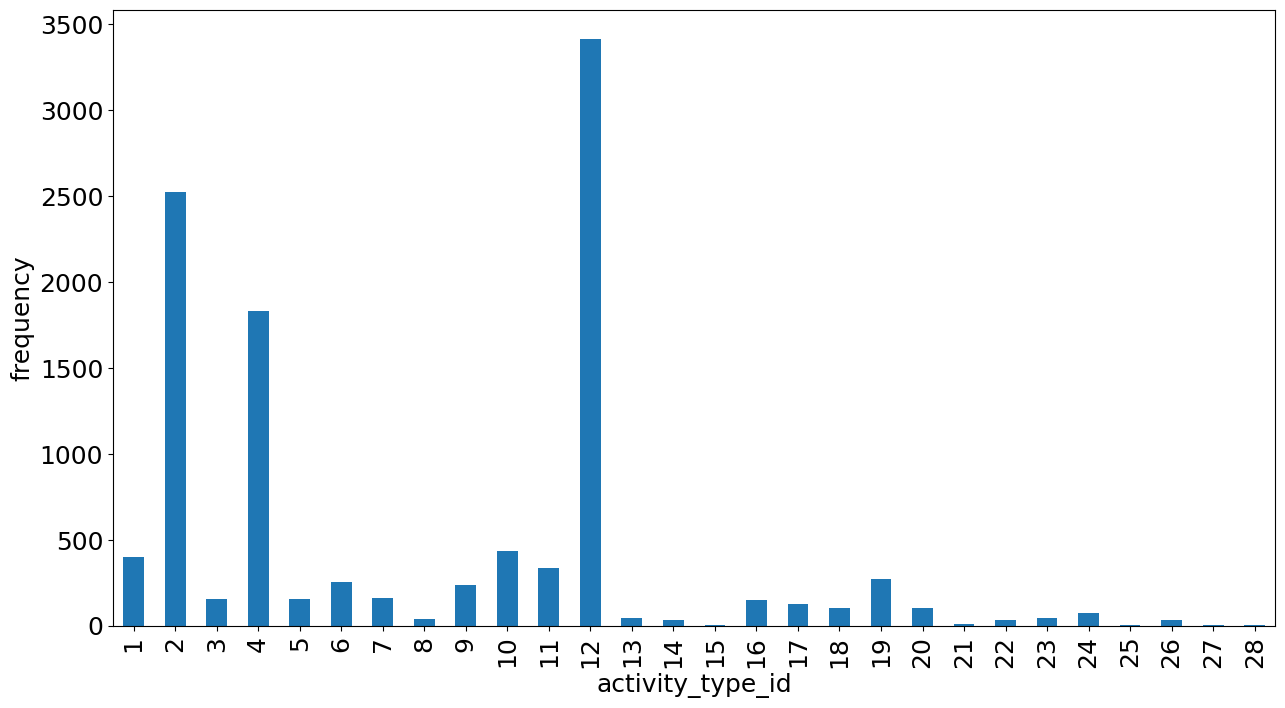

In [36]:
plt.rcParams["font.size"] = 18
fig, ax = plt.subplots(1, 1, figsize=(15, 8))
df_care.groupby(["activity_type_id"]).count()["id"].plot(kind="bar", ax=ax);
ax.set_ylabel("frequency", fontsize=18)
ax.set_xlabel("activity_type_id", fontsize=18)
fig.savefig("../results/activity_frequency.png")

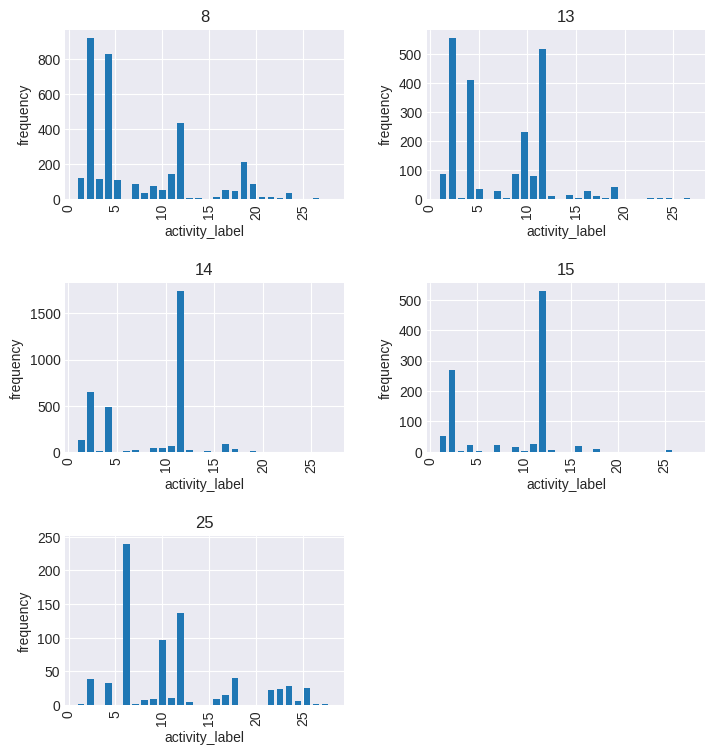

In [ ]:
mpl.style.use("seaborn-darkgrid")
axes = df_care.hist(by='user_id', column='activity_type_id', bins=28, width=0.7, figsize=(8, 9), align="mid")

# set xlabel
axes[0][0].set_xlabel("activity_label")
axes[0][1].set_xlabel("activity_label")
axes[1][0].set_xlabel("activity_label")
axes[1][1].set_xlabel("activity_label")
axes[2][0].set_xlabel("activity_label")

# set ylabel
axes[0][0].set_ylabel("frequency")
axes[0][1].set_ylabel("frequency")
axes[1][0].set_ylabel("frequency")
axes[1][1].set_ylabel("frequency")
axes[2][0].set_ylabel("frequency")

plt.savefig("../results/activity_label_each_user.png")

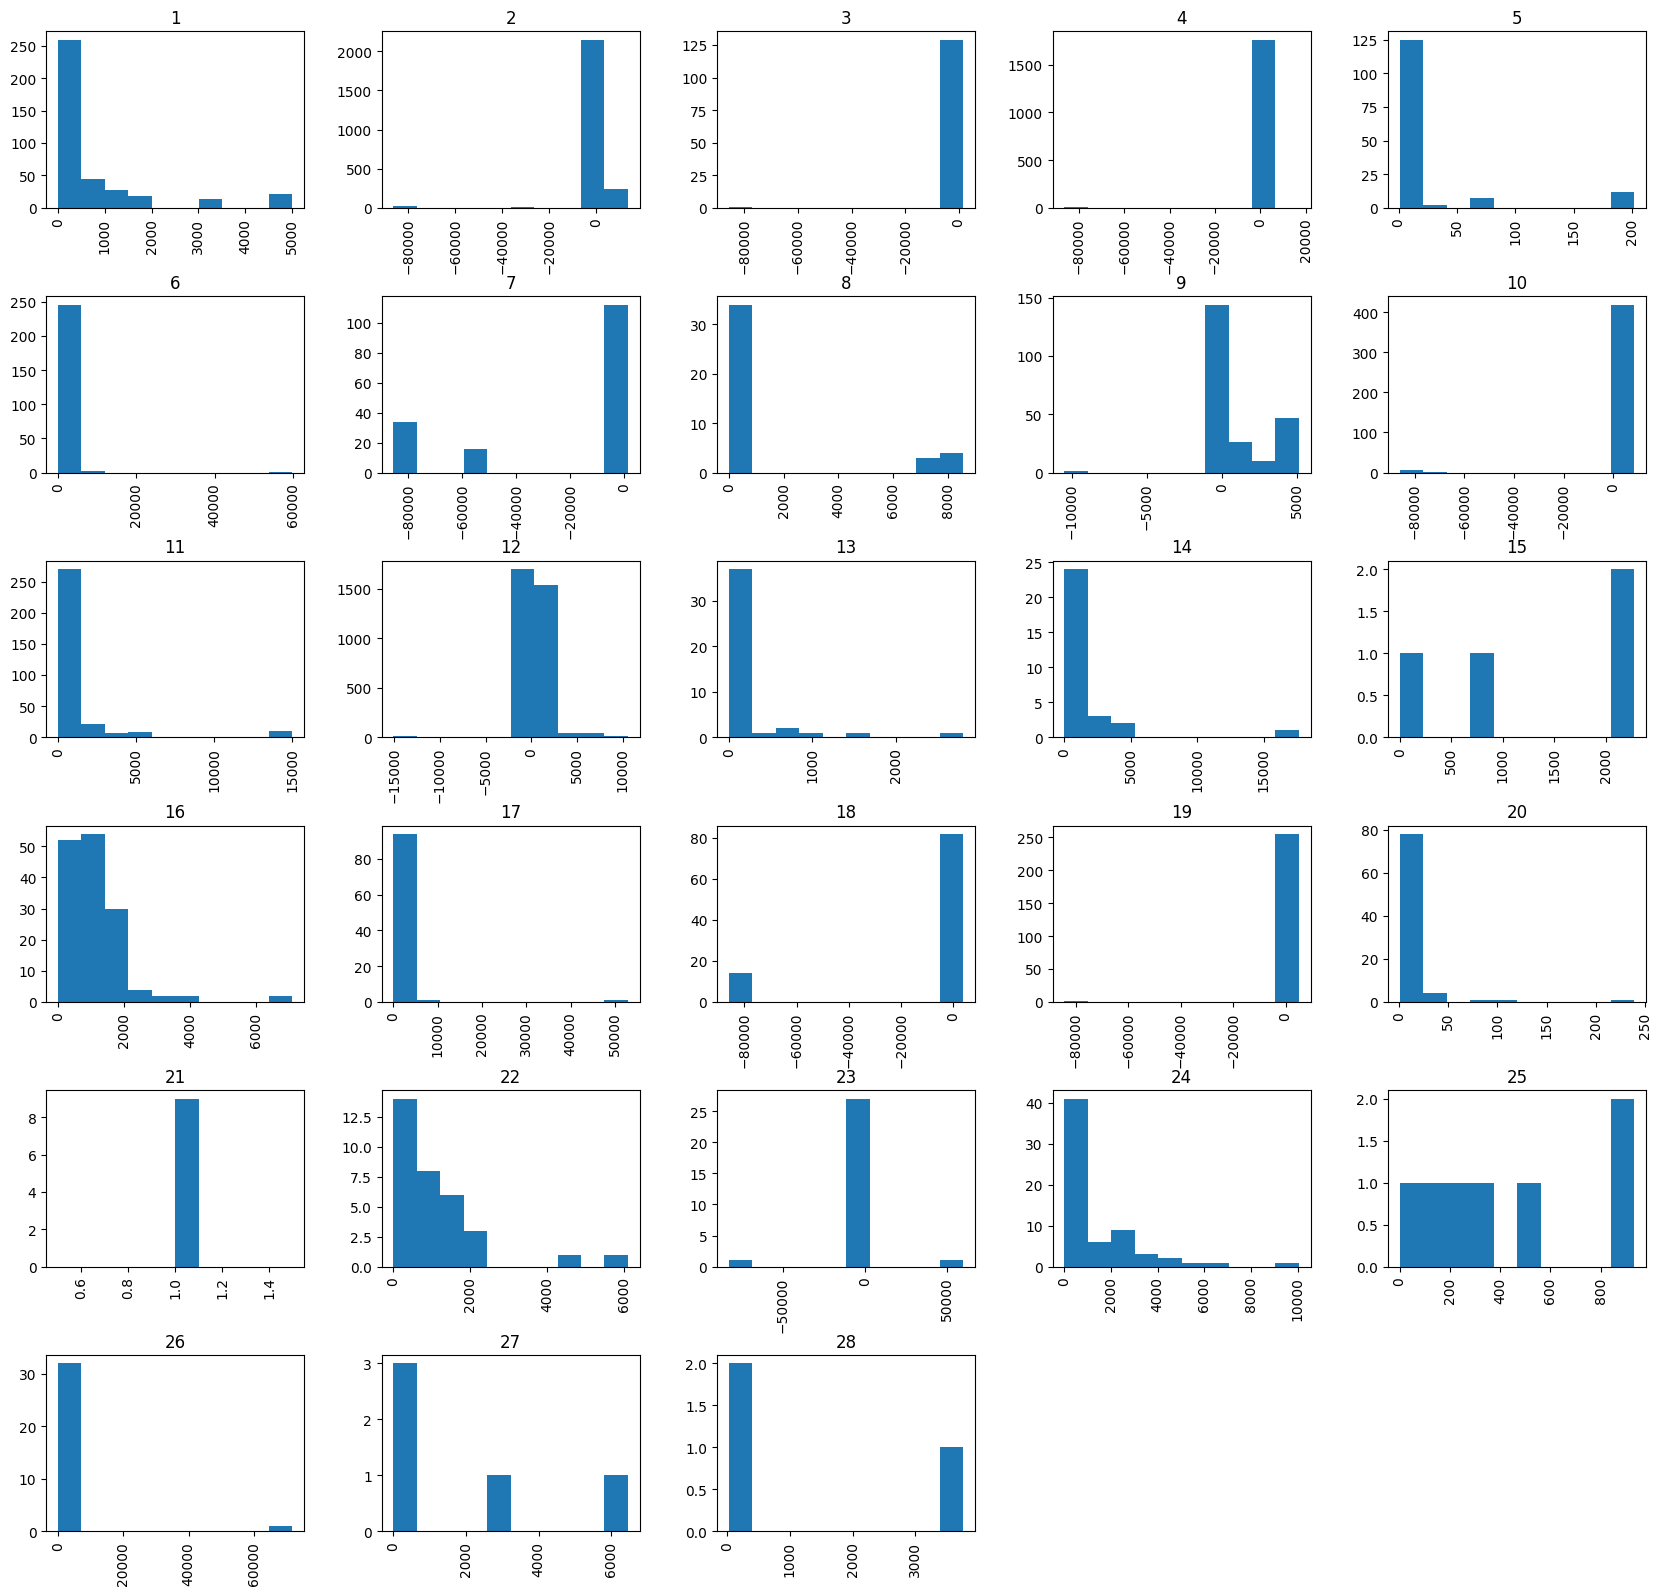

In [ ]:
# df_care.hist(column="time_length_seconds", by="activity_type_id", figsize=(20, 20));
# plt.savefig("../results/time_length_each_activity.png")

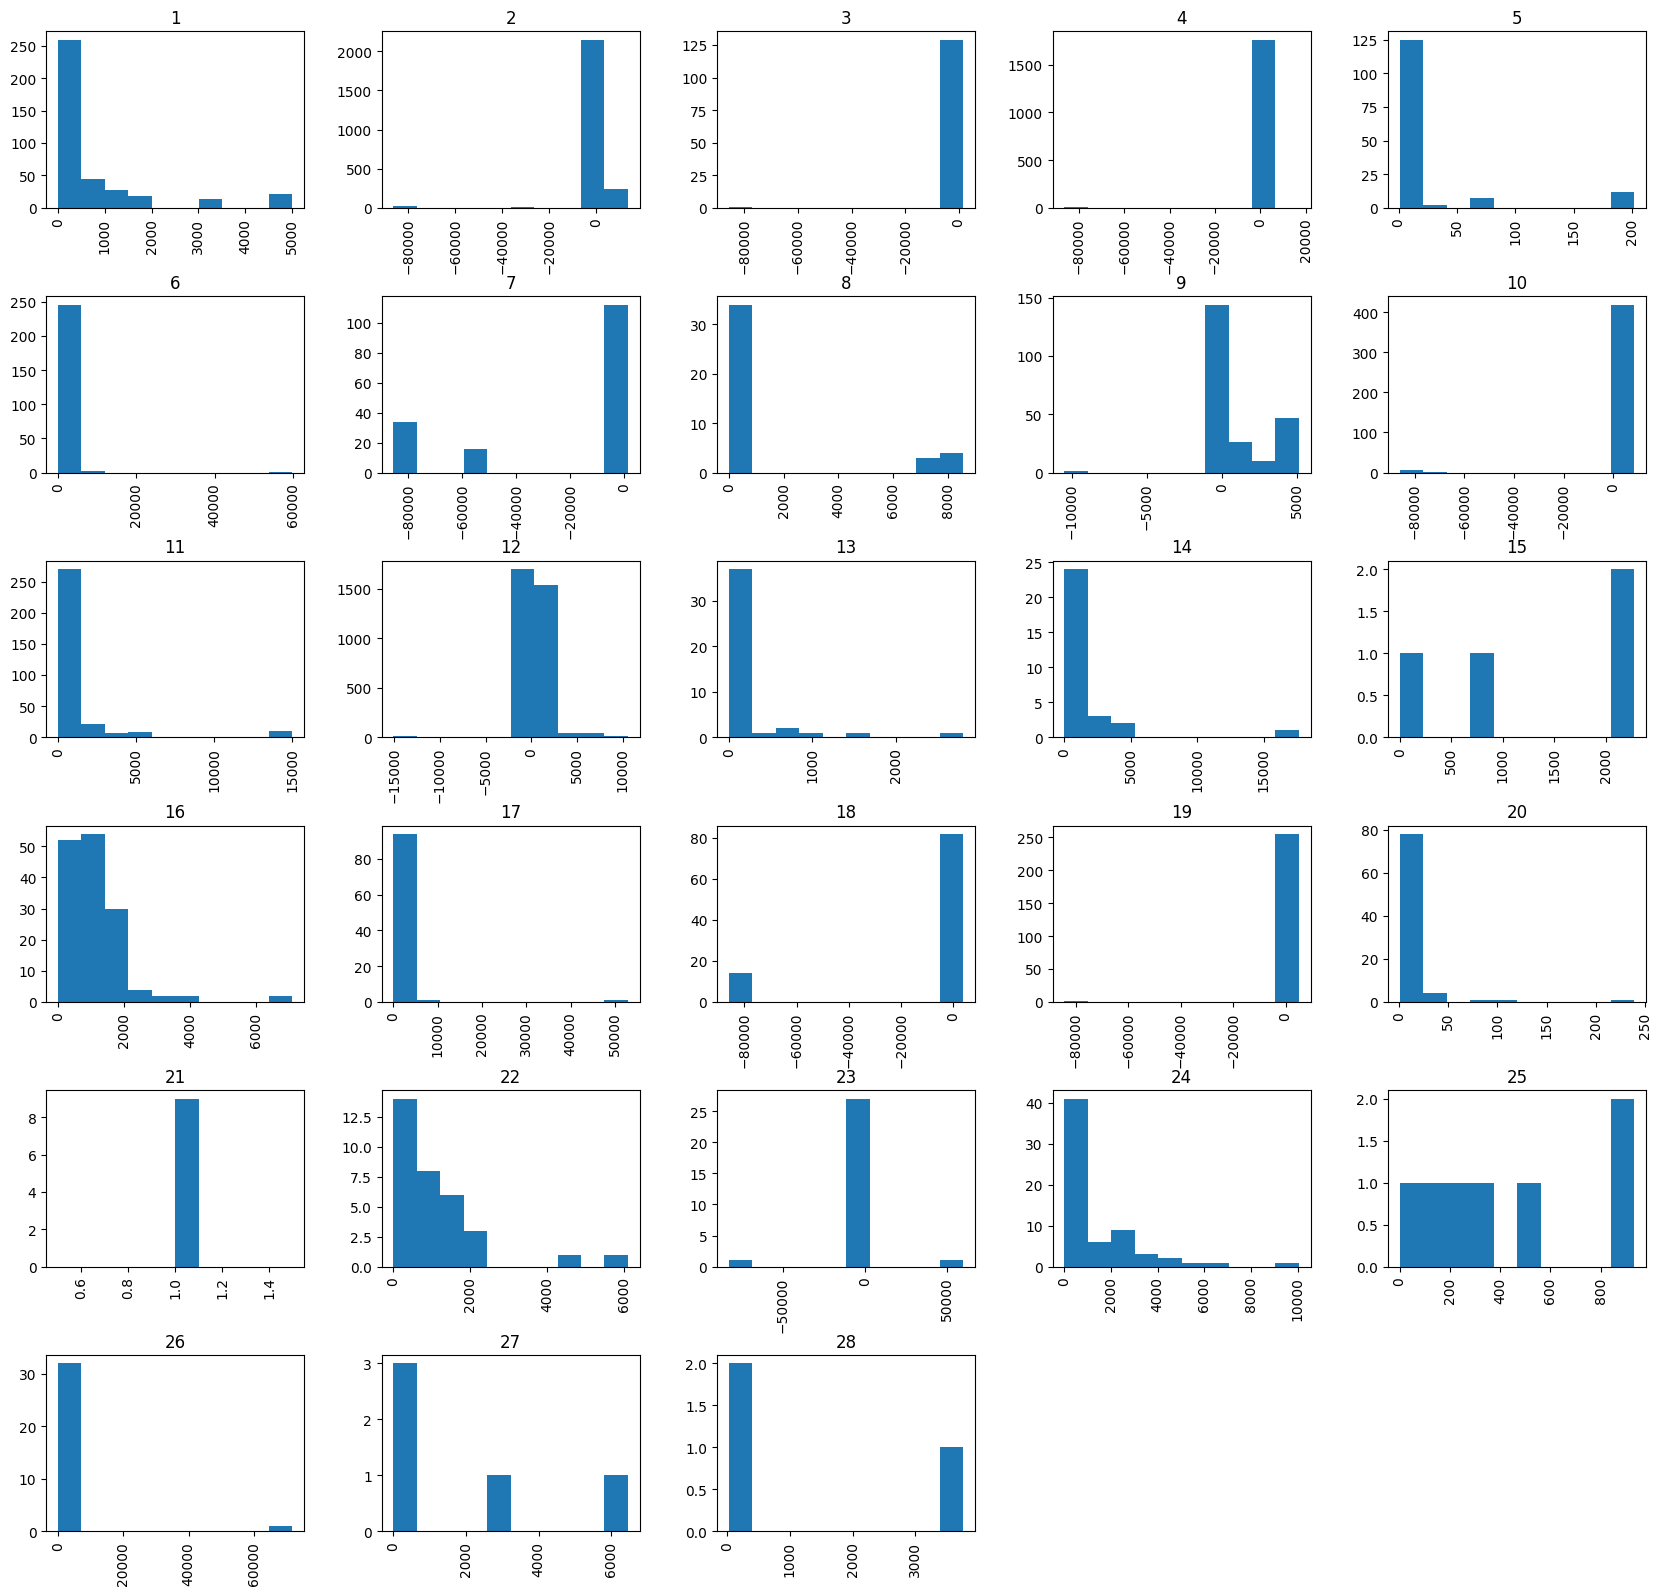

In [ ]:
# df_care.hist(column="time_length_seconds", by="activity_type_id", figsize=(20, 20));
# plt.savefig("../results/activity_time_length.jpg")

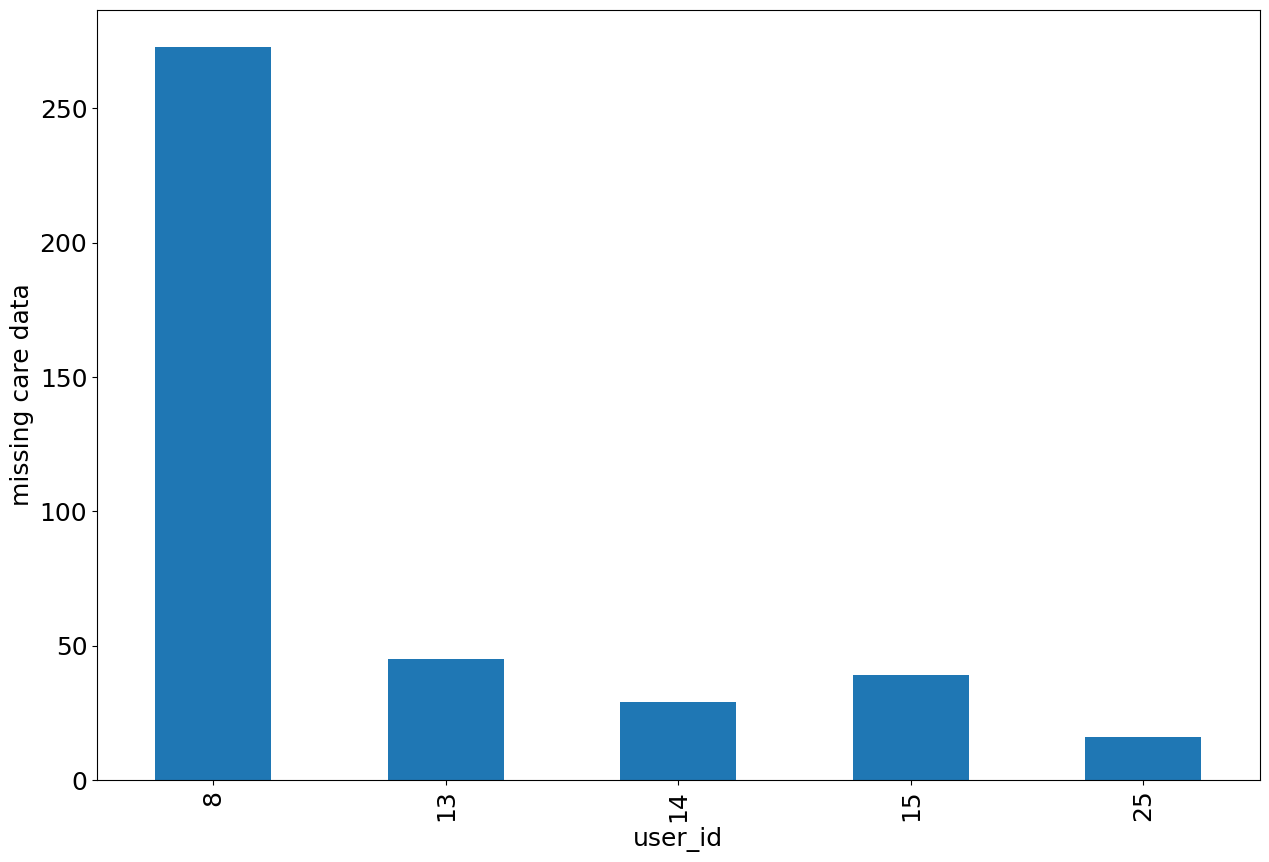

In [35]:
plt.rcParams["font.size"] = 18
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
df_care.groupby(["user_id"])["finish"].apply(lambda x: x.isnull().sum()).plot(kind="bar", ax=ax)
ax.set_ylabel("missing care data", fontsize=18)
ax.set_xlabel("user_id", fontsize=18)
plt.savefig("../results/missing_data.png")

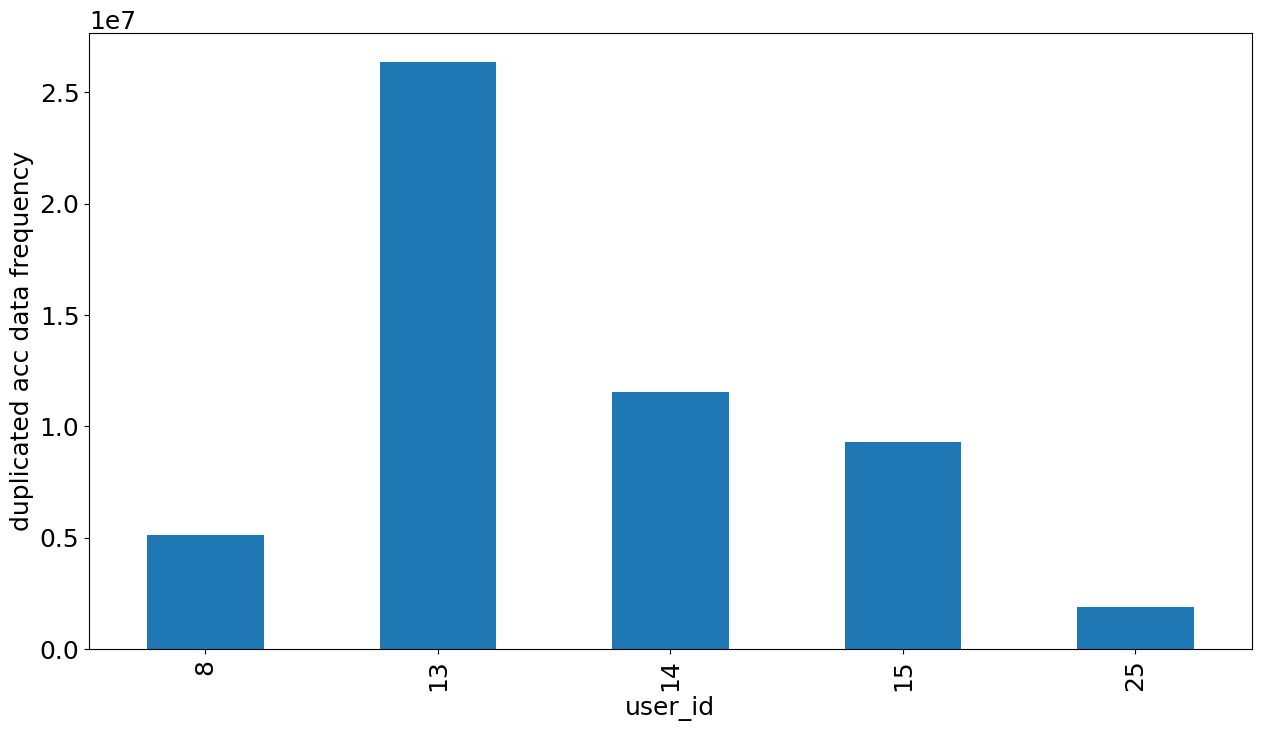

In [37]:
plt.rcParams["font.size"] = 18
fig, ax = plt.subplots(1, 1, figsize=(15, 8))
df_acc.groupby(["subject_id"])["x"].apply(lambda x: x.duplicated().sum()).plot(kind="bar", ax=ax)
ax.set_xlabel("user_id", fontsize=18)
ax.set_ylabel("duplicated acc data frequency", fontsize=18)
plt.savefig("../results/acc_duplicated_data.png")

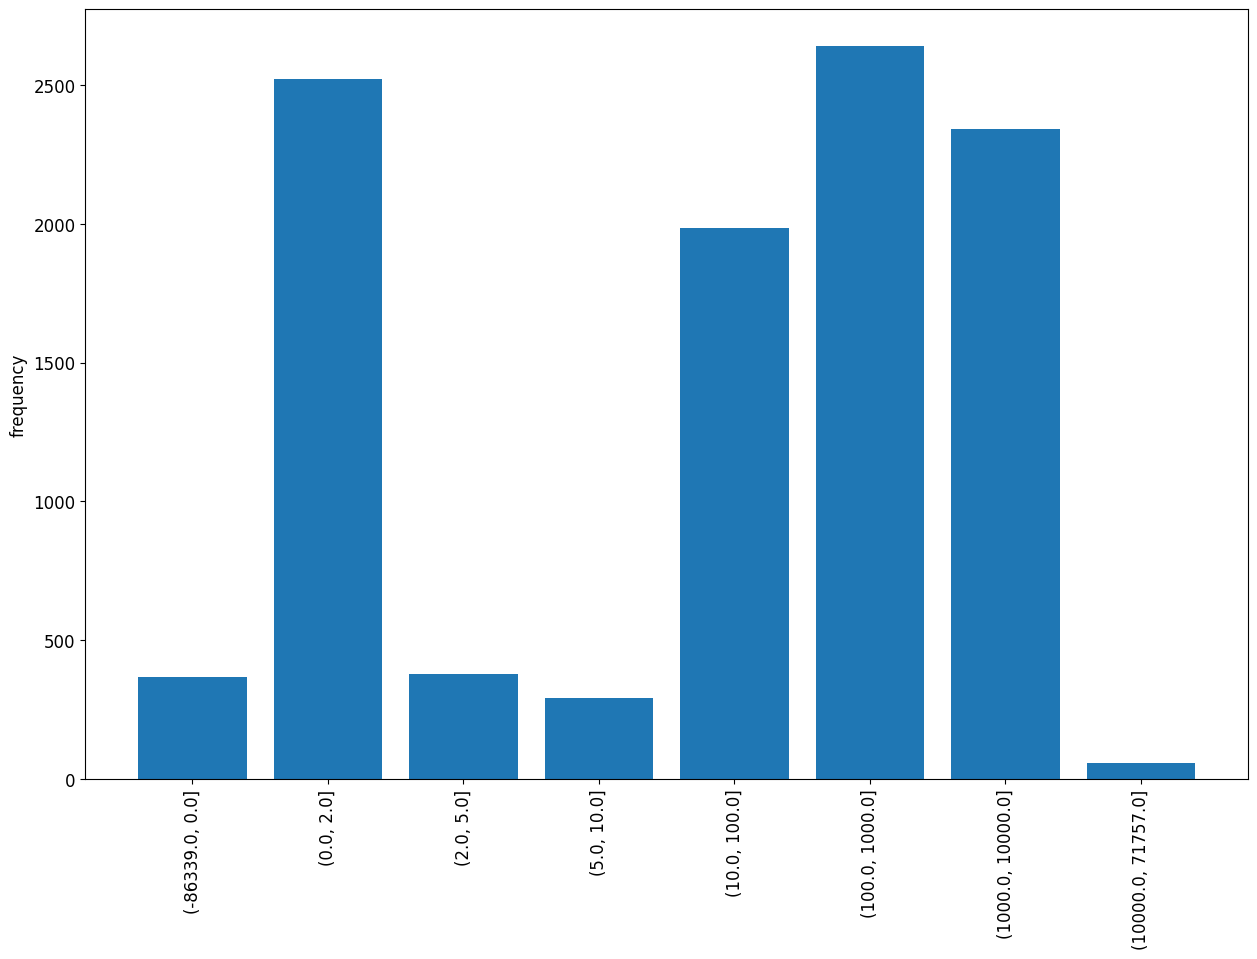

In [ ]:
# s_cut = pd.cut(df_care["time_length_seconds"], [min(df_care["time_length_seconds"]), 0, 2, 5, 10, 100, 1000, 10000, max(df_care["time_length_seconds"])])
# data = s_cut.value_counts().sort_index()
# mpl.style.use("default")
# plt.figure(figsize=(15, 10))
# data = s_cut.value_counts().sort_index()
# plt.xticks(rotation=90, fontsize=12)
# plt.yticks(fontsize=12)
# plt.ylabel("frequency", size=12)
# plt.bar(data.index.astype(str), data);
# plt.savefig("../results/time_length_frequencty.png")